# TD2 : Réactions biochimiques

##### Objet : mise en équation de réactions biochimiques
##### Objectifs : comprendre la loi d’action de masse et la conservation de la matière

### Dégradation

On commence par la dégradation d’un substrat de manière standard
A−k→ ∅
1. Ecrire l’équation différentielle qui gouverne l’évolution de A et écrire le script qui
permet de résoudre cette équation pour une condition initiale choisie


In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import fmin

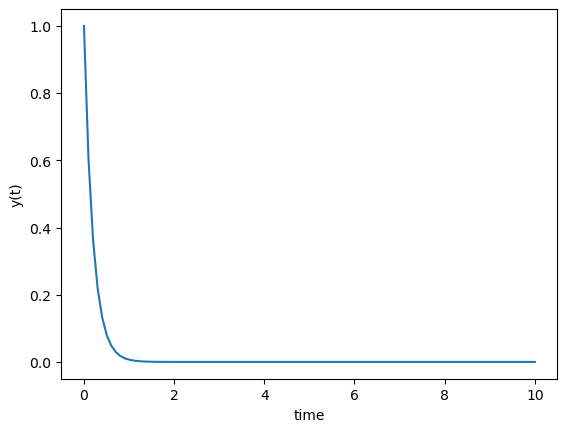

In [3]:
def model(y,t,k):
    dydt = -k*y
    return dydt

k = 5
y0 = 1.0
t = np.linspace(0,10,100)

y = odeint(model,y0,t,args=(k,))

plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

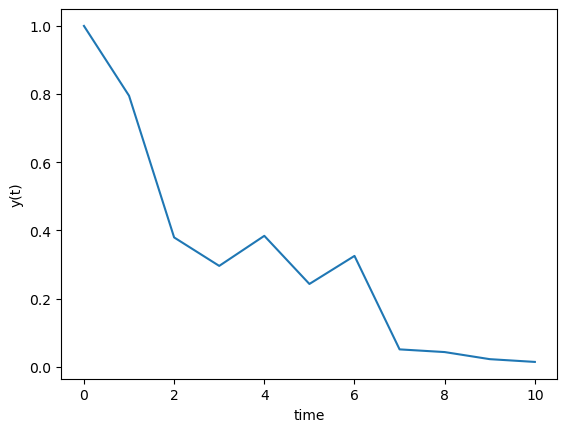

In [4]:

t = np.linspace(0,10,11)
y = [1.0,0.7952,0.3795,0.2960,0.3842,0.243,0.3253,0.0511,0.0432,0.0224,0.0143]

plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

In [5]:
t = np.linspace(0,10,11)

data = np.array([t,y])

def sse(k,data):
    return np.sum(np.square(data[1,:]-np.exp(-k*data[0,:])))

fdata=fmin(sse,k,args=(data,))
print(fdata)




Optimization terminated successfully.
         Current function value: 0.085056
         Iterations: 21
         Function evaluations: 42
[0.31707764]


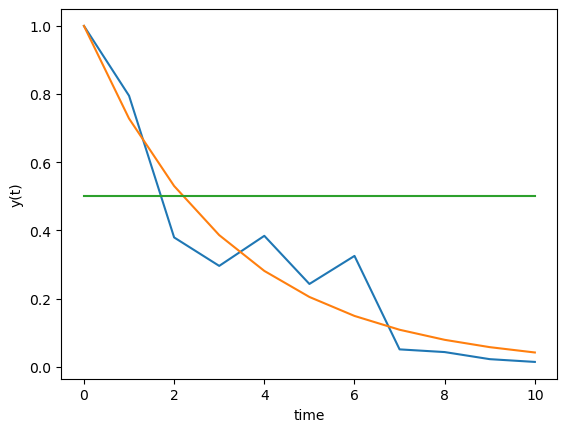

In [6]:
plt.plot(t,y)
plt.plot(data[0,:],np.exp(data[0,:]*(-fdata)))
plt.plot(t,0.5*np.ones(len(t)))

plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

In [7]:
t12 = np.log(2)/fdata[0]
print("demi vie estimée = ",t12)

#interpolation possible avec np.interp

demi vie estimée =  2.1860487788824146


### Réaction suicide

In [ ]:
#dadt-dbdt = 0
#a(t)-b(t) = c
#en particuleir
#c = a(0)-b(0)
#a(t) = a(0)-b(0)+b(t)
#donc
#dbdt = -kB(c+b)

In [10]:
def rsmodel(y,t,k):
    a = y[0]
    b = y[1]
    dadt = -k*a*b
    dbdt = -k*a*b
    return [dadt,dbdt]

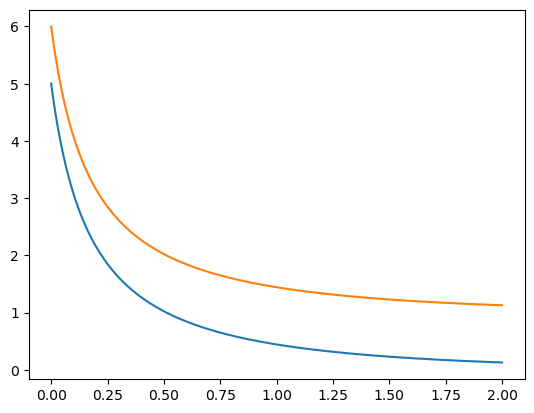

In [14]:
#Reso

k = 1
y0=[5,6]
t = np.linspace(0,2,300)
y1 = odeint(rsmodel,y0,t,args=(k,))
plt.figure()
plt.plot(t,y1)
plt.show()

## Dimérisation

In [25]:
def dim_model(y,t,k_un,k_m_un):
    a = y[0]
    b = y[1]
    dadt = -2*k_un*a*a + 2*k_m_un*b
    dbdt = -dadt/2
    return [dadt,dbdt]


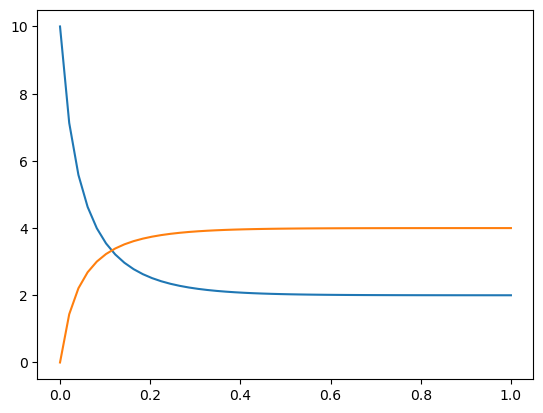

In [26]:
#Reso

k_un = 1
k_m_un = 1
y0=[10,0]
t = np.linspace(0,1,50)
y1 = odeint(dim_model,y0,t,args=(k_un,k_m_un,))
plt.figure()
plt.plot(t,y1)
plt.show()

## Trimérisation

In [65]:
def tri_model(y,t,k1,k_1,k2,k_2):
    a = y[0]
    b = y[1]
    c = y[2] 
    dadt = -2*k1*a*a + 2*k_1*b -k2*a*b + k_2*c
    dbdt = k1*a*a - k_1*b -k2*a*b + k_2*c
    dcdt = k2*a*b - k_2*c
    return [dadt,dbdt,dcdt]


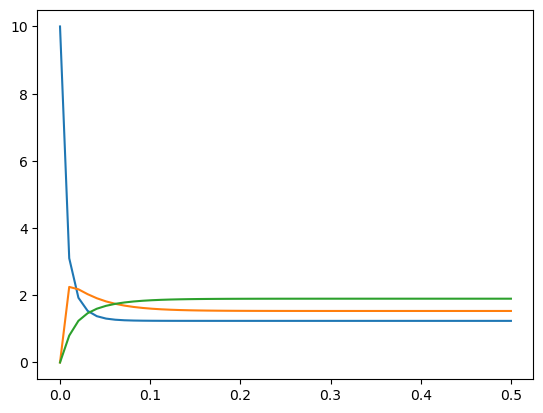

In [69]:
#Reso

k1 = 10
k_1 = 10
k2 = 10
k_2 = 10

y0=[10,0,0]
t = np.linspace(0,0.5,50)
y1 = odeint(tri_model,y0,t,args=(k1,k_1,k2,k_2,))
plt.figure()
plt.plot(t,y1)
plt.show()

In [70]:
def tri_immed_model(y,t,k1,k_1):
    a = y[0]
    c = y[1] 
    dadt = -3*k1*a*a*a + 3*k_1*c 
    dcdt = -dadt/3
    return [dadt,dcdt]

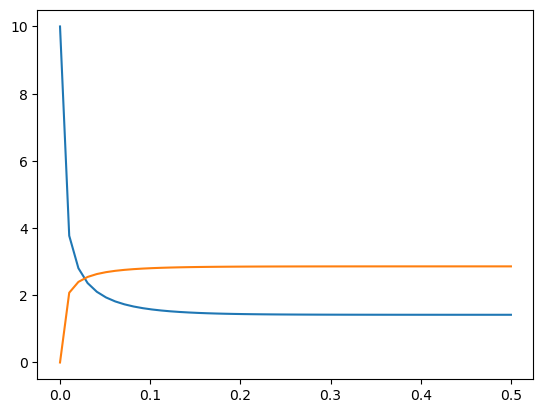

In [71]:
#Reso

k1 = 1
k_1 = 1

y0=[10,0]
t = np.linspace(0,0.5,50)
y1 = odeint(tri_immed_model,y0,t,args=(k1,k_1,))
plt.figure()
plt.plot(t,y1)
plt.show()

## Reaction enzyme-substrat

In [72]:
def ligr1_model(y,t,k1,k_1):
    l= y[0]
    r = y[1]
    r1 = y[2]
    dldt = -k1*l*r + k_1*r1
    drdt = dldt
    dr1dt = -dldt
    return [dldt,drdt,dr1dt]

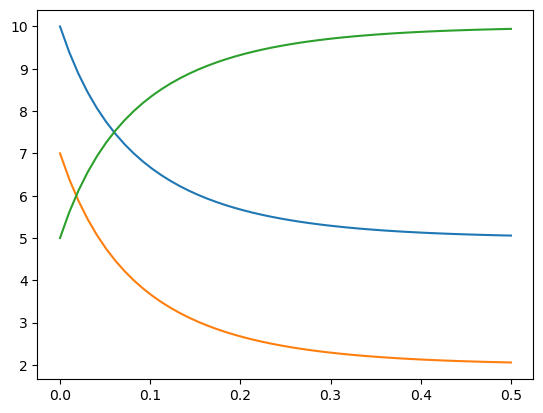

In [76]:
#Reso

k1 = 1
k_1 = 1

y0=[10,7,5]
t = np.linspace(0,0.5,50)
y1 = odeint(ligr1_model,y0,t,args=(k1,k_1,))
plt.figure()
plt.plot(t,y1)
plt.show()

In [107]:
def compet_model(y,t,k1,k_1,k2,k_2):
    l = y[0]
    i = y[1]
    r = y[2]
    r1 = y[3]
    r2 = y[4]
    dldt = -k1*l*r + k_1*r1
    didt = -k2*i*r + k_2*r2
    drdt = -k1*l*r + k_1*r1 -k2*i*r + k_2*r2
    dr1dt = -dldt
    dr2dt = -didt
    return [dldt,didt,drdt,dr1dt,dr2dt]

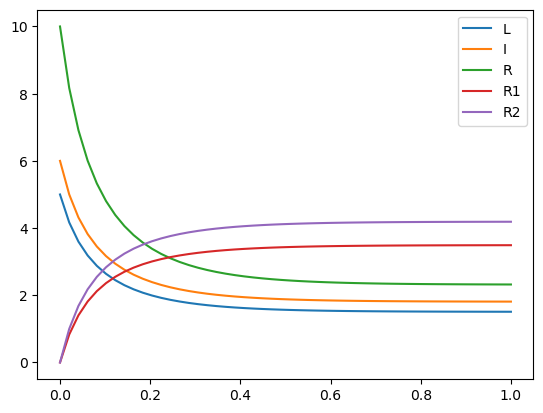

In [108]:
#Reso

k1 = 1
k_1 = 1
k2 = 1
k_2 = 1

y0=[5,6,10,0,0]
t = np.linspace(0,1,50)
y1 = odeint(compet_model,y0,t,args=(k1,k_1,k2,k_2,))
plt.figure()
plt.plot(t,y1[:,0],label = 'L')
plt.plot(t,y1[:,1],label = 'I')
plt.plot(t,y1[:,2],label = 'R')
plt.plot(t,y1[:,3],label = 'R1')
plt.plot(t,y1[:,4],label = 'R2')
plt.legend()
plt.show()

In [111]:
def compet_i_cste_model(y,t,k1,k_1,i):
    l = y[0]
    r = y[1]
    r1 = y[2]
    dldt = -k1*l*r + k_1*r1
    drdt = k_1*r - l*r*k1/(i)
    dr1dt = -dldt
    return [dldt,drdt,dr1dt]

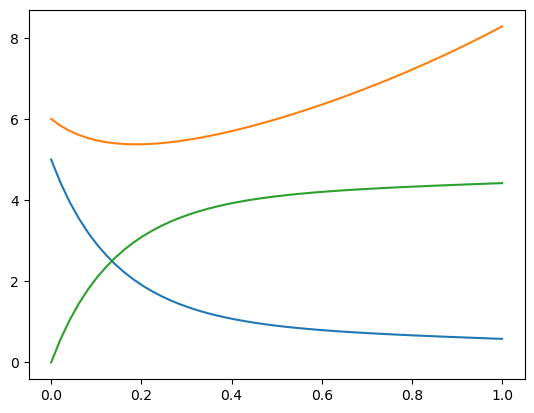

In [113]:
#Reso

k1 = 1
k_1 = 1
i = 2

y0=[5,6,0]
t = np.linspace(0,1,50)
y1 = odeint(compet_i_cste_model,y0,t,args=(k1,k_1,i,))
plt.figure()
plt.plot(t,y1)
plt.show()